In [1]:
sesame <- read.csv("https://tinyurl.com/wlgl63b")
library(arm)
sesame

Warning message:
"package 'arm' was built under R version 3.6.2"Loading required package: MASS
Loading required package: Matrix
Loading required package: lme4
Warning message:
"package 'lme4' was built under R version 3.6.2"
arm (Version 1.10-1, built: 2018-4-12)

Working directory is C:/Users/jrese



post.test,pre.test,treatment
116.2,105.9,1
116.9,100.8,1
106.9,91.7,1
104.6,97.5,1
114.2,106.5,1
113.6,107.4,1
116.6,111.4,1
114.8,110.0,1
114.9,106.9,1
111.0,106.7,1


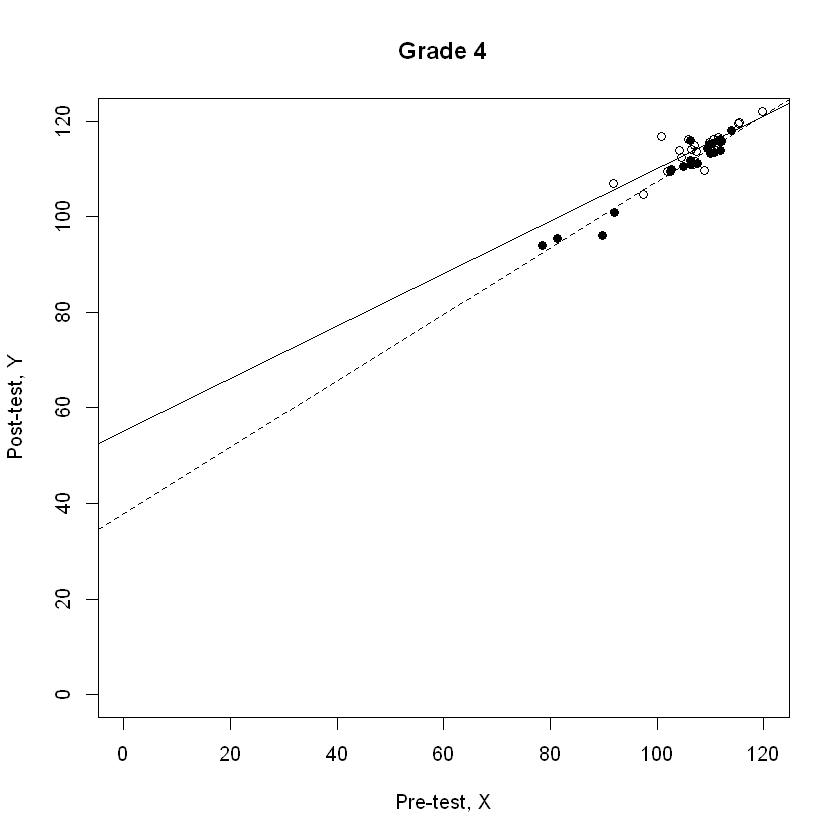

In [2]:
#QUESTION 1(A)

treatment_group <- subset(sesame, sesame$treatment == 1)
lm.t <- lm(treatment_group$post.test ~ treatment_group$pre.test)
control_group <- subset(sesame, sesame$treatment == 0)
lm.c <- lm(control_group$post.test ~ control_group$pre.test)
treatment_group1 <- subset(sesame, sesame$treatment == 1)

# Generating plot
plot(treatment_group$pre.test, treatment_group$post.test,
     main = "Grade 4",
     xlab = "Pre-test, X",
     ylab = "Post-test, Y",
     xlim = c(0, 120),
     ylim = c(0, 120),
     pch = 1
    )
points(control_group$pre.test, control_group$post.test, pch = 16)
abline(a = coef(lm.t)[1],
       b = coef(lm.t)[2],
       lty = 1)
abline(a = coef(lm.c)[1],
       b = coef(lm.c)[2],
       lty = 2)

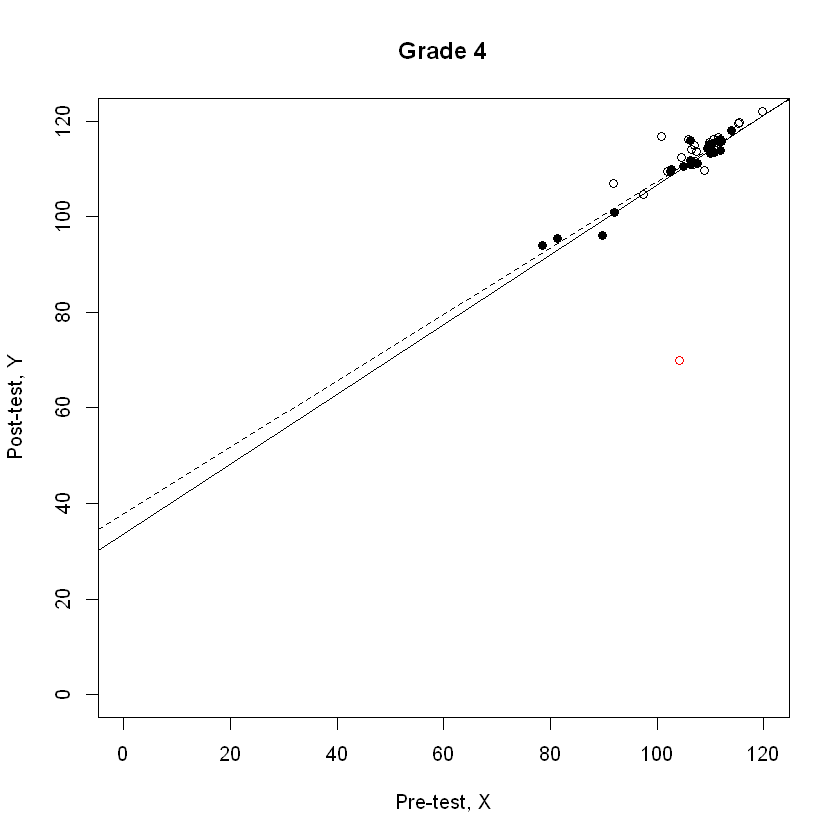

In [3]:
#Question 1(B)
leverage.p = treatment_group[11,]
modified.l = c(70, 104.1, 1)
treatment_group[11,] = modified.l

plot(treatment_group$pre.test, treatment_group$post.test,
    col=ifelse(treatment_group$post.test == 70, "red", "black"),
     main = "Grade 4",
     xlab = "Pre-test, X",
     ylab = "Post-test, Y",
     xlim = c(0, 120),
     ylim = c(0, 120),
     pch = 1
    )


points(control_group$pre.test, control_group$post.test, pch = 16)
abline(lm(treatment_group$post.test ~ treatment_group$pre.test), lty = 1)
abline(a = coef(lm.c)[1],
       b = coef(lm.c)[2],
       lty = 2)

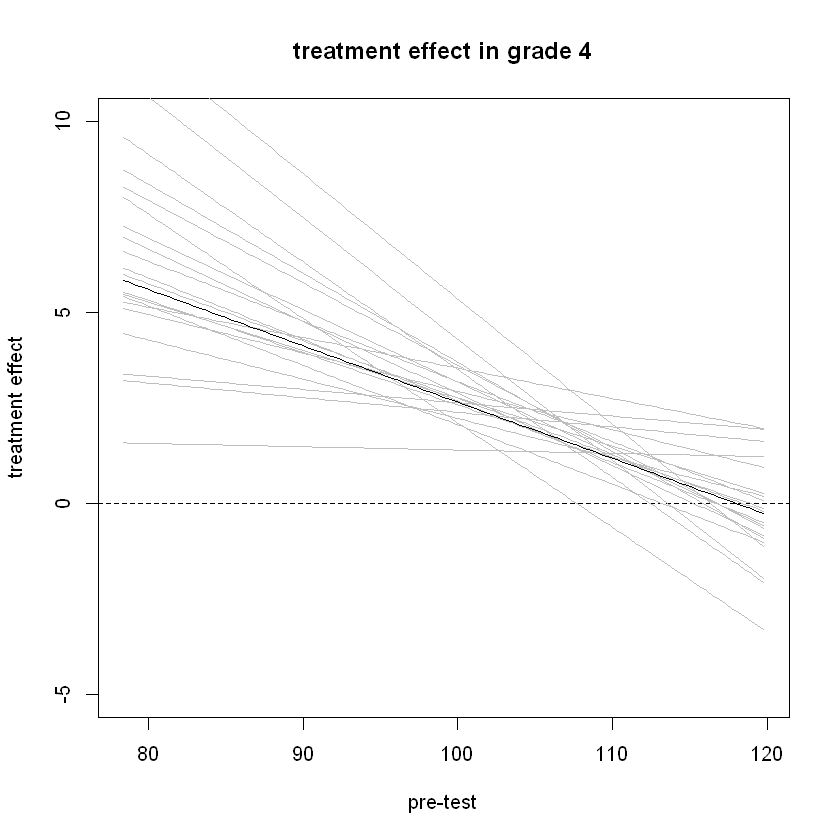

In [4]:
#Question 1(C)
lm.4 <- lm(sesame$post.test ~ sesame$treatment + sesame$pre.test + sesame$treatment:sesame$pre.test)
lm.4.sim <- sim(lm.4)
plot (0, 0, xlim=range (sesame$pre.test), ylim=c(-5,10),
xlab="pre-test", ylab="treatment effect",
main="treatment effect in grade 4")
abline (0, 0, lwd=.5, lty=2)

for (i in 1:20){
curve(coef(lm.4.sim)[i,2] + coef(lm.4.sim)[i,4]*x, lwd=.5, col="gray",
add=TRUE)}

curve (coef(lm.4)[2] + coef(lm.4)[4]*x, lwd=.5, add=TRUE)

In [5]:
#Question 2(A)

tinting = read.csv(url("https://tinyurl.com/v4bq99k"))


set.seed(123)

lm1 <- lm(csoa~age+sex+target+I(tint != "no")+ I(as.numeric(tint!="no")*age), data = tinting)

iterations = 10000

sim_a <- sim(lm1, n.sims = iterations)

In [6]:
# Predicting CSO


ages <- c(20, 30, 40, 50, 60, 70, 80)

simulated.ys_mean.trt <- matrix(NA, nrow = iterations, ncol = length(ages))

for (age in ages) {
Xs <- c(1, age, 0, 0, 1, 1*age)

for (i in 1:iterations) {
simulated.ys_mean.trt[i, ((age - min(ages))/10)+1] <- sum(Xs*sim_a@coef[i,]) 
  }
}

# Expected Mean
e_mean <- c()
for (i in 1:7){
  e_mean[[i]] <- mean(simulated.ys_mean.trt[,i])
}

# Confidence Intervals
conf.intervals_mean.trt <- apply(simulated.ys_mean.trt, 2, quantile, probs = c(0.025, 0.975))

# Generating Table
table_mean.trt <- t(data.frame(conf.intervals_mean.trt))
table_mean.trt <- data.frame(table_mean.trt, expec_means)
colnames(table_mean.trt) <- c("Lower Bound", "Upper Bound", "Mean Expected Values")
rownames(table_mean.trt) <- ages
table_mean.trt

,Lower Bound,Upper Bound,Mean Expected Values
20,32.35524,41.66999,36.98194
30,36.16078,44.46785,40.27349
40,39.69734,47.48070,43.56504
50,42.98865,50.88717,46.85659
60,45.95080,54.51645,50.14814
70,48.63820,58.35574,53.43969
80,51.14707,62.41348,56.73124


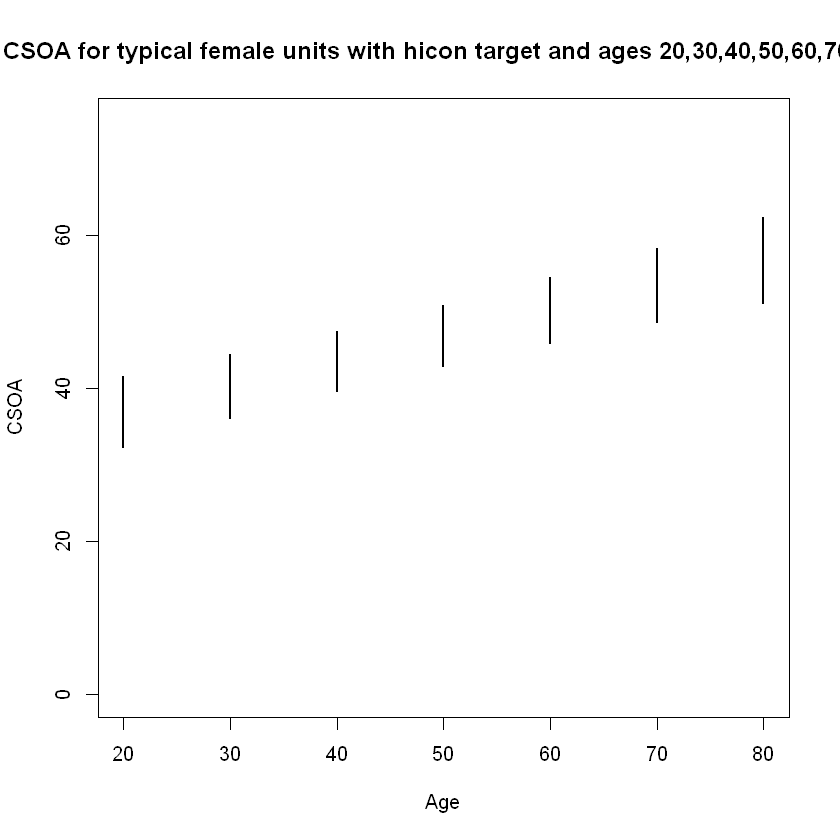

In [7]:
# Plot the prediction intervals (y-axis) against age (x-axis)
plot(x = c(1:100), y = c(1:100), type = "n", 
xlim <- c(20,80),
ylim <- c(-0,75), 
main <- "CSOA for typical female units with hicon target and ages 20,30,40,50,60,70,80", xlab = "Age", 
ylab <- "CSOA")


for (age in ages) {
  segments(
x0 = age,
y0 = conf.intervals_mean.trt[1, ((age - min(ages))/10)+1],
x1 = age,
y1 = conf.intervals_mean.trt[2, ((age - min(ages))/10)+1],
lwd = 2)
}

In [8]:
#Question 3
library(Matching)
data('lalonde')

rsq <- function(actual, predicted) {
    rss = sum((predicted - actual) ^ 2)
    tss = sum((actual - mean(actual)) ^ 2)
    rsq = (1 - rss / tss)
    return (rsq)
}


#preds <- c(1, 2, 3)
#actual <- c(2, 2, 4)
#rss <- sum((preds - actual) ^ 2)  ## residual sum of squares
#tss <- sum((actual - mean(actual)) ^ 2)  ## total sum of squares
#rsq <- 1 - rss/tss

Warning message:
"package 'Matching' was built under R version 3.6.2"## 
##  Matching (Version 4.9-6, Build Date: 2019-04-07)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



In [9]:
lm.example <- lm(re78 ~ educ, data = lalonde)

educ <- c()
actual <- c()
predicted <- c()

for (i in 1:dim(lalonde)[1]) {
    educ[i] = lalonde[i,2]
    actual[i] = lalonde[i,9]
    predicted[i]= lalonde[i,2] * coef(lm.example)[1] + coef(lm.example)[2]
}

rsq(actual, predicted)
summary(lm.example)$r.squared

[1] -0.4634579

[1] 0.01349443

In [ ]:
#Question 4

library(foreign)
#Loads necessery data set
foo <- read.dta('mazedata1.dta')
# head(foo)

treat <- subset(foo, foo$treatment == 'Caste Revealed')
control <- subset(foo, foo$treatment != 'Caste Revealed')

storage <- c()

# runs a bootstrap by sampling with replacement on index and applies them
for(i in 1:10000){
    #treatment
    dependent.t <- foo$round1[sample(length(treat),length(treat),replace = TRUE)]
    mean.treat <- mean(dependent.t, na.rm = TRUE)
    #control
    dependent.c <- foo$round1[sample(length(control), length(control), replace = TRUE)]
    mean.control <- mean(dependent.c, na.rm = TRUE)
    storage[i] <- mean.treat - mean.control
}

In [11]:
#95% interval - bootstrapped values
interval.b <- quantile(storage, probs = c(0.025, 0.975))

#regression model and confint
regression <- lm(round1~treatment, data=foo)
interval <- confint(regression, level = 0.95)[2,]

#table
table <- data.frame('Bootstrapped'= interval.b, 'Regression'= interval)
table

,Bootstrapped,Regression
2.5%,-0.8846154,-0.2893112
97.5%,0.8846154,0.6752087


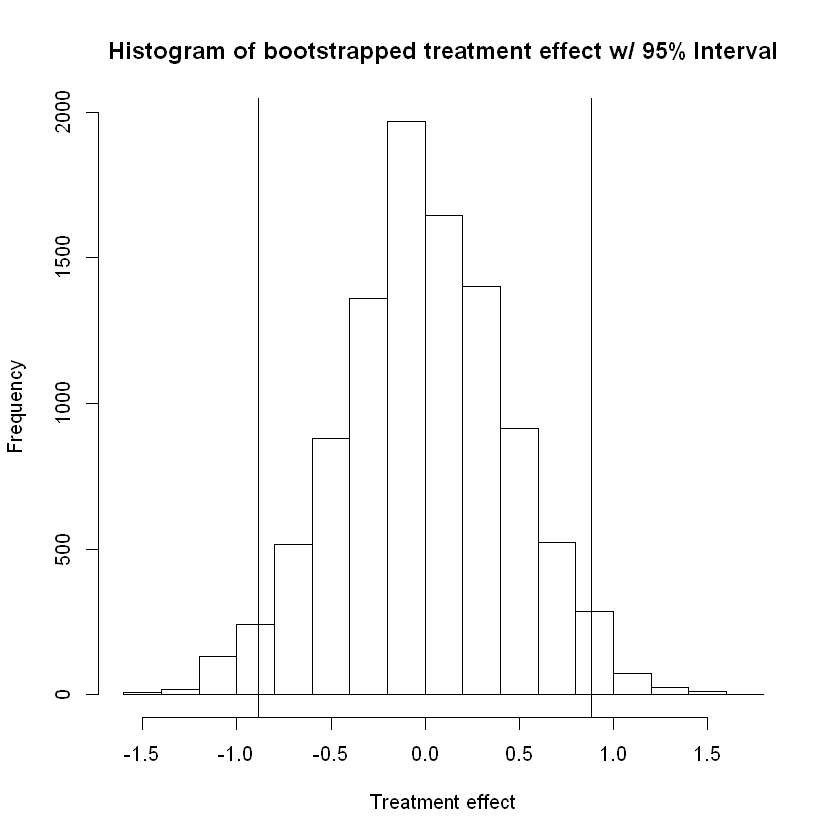

In [12]:
#histogram
hist(storage, main = "Histogram of bootstrapped treatment effect w/ 95% Interval", xlab= "Treatment effect")

abline(v = interval.b)

In [1]:
#Question 5

library(boot)

foo1 <- read.csv(url("https://tinyurl.com/yx8tqf3k"))
head(foo1)
set.seed(12345)
test_set_rows = sample(1:length(foo1$age), 2000, replace = FALSE)

training <- foo1[-test_set_rows,]
test <- foo1[test_set_rows,]

#simple 
simple.m <- glm(treat~age,data=training)
#complex
complex.m <- glm(treat~.-re78,data=training)


treat,age,education,black,hispanic,married,nodegree,re74,re75,re78,u74,u75
1,37,11,1,0,1,1,0,0,9930.0459,TRUE,TRUE
1,22,9,0,1,0,1,0,0,3595.8940,TRUE,TRUE
1,30,12,1,0,0,0,0,0,24909.4492,TRUE,TRUE
1,27,11,1,0,0,1,0,0,7506.1460,TRUE,TRUE
1,33,8,1,0,0,1,0,0,289.7899,TRUE,TRUE
1,22,9,1,0,0,1,0,0,4056.4939,TRUE,TRUE


In [2]:
#runs LOOCV on models 
loocv.simple <- cv.glm(training,simple.m)
loocv.complex <- cv.glm(training,complex.m)


In [3]:
#runs 10-fold CV 
cv.simple <- cv.glm(training,simple.m, K = 10)
cv.complex <- cv.glm(training,complex.m, K = 10)

# test MSE from the models
test.simple <- mean((test$treat - predict.glm(simple.m,test))^2)
test.complex <- mean((test$treat - predict.glm(complex.m,test))^2)

In [17]:
loocv <- c(loocv.simple$delta[1], loocv.complex$delta[1])
cv <- c(cv.simple$delta[1], cv.complex$delta[1])
test <- c(test.simple, test.complex)
summary <- data.frame('Ten-fold' = cv, 'LOOCV' = loocv, 'Test-set error' = test)
row.names(summary) <- c('Simple_model', 'Complex_model')
summary

,Ten.fold,LOOCV,Test.set.error
Simple_model,0.011374458,0.01137299,0.010381819
Complex_model,0.009997288,0.01000127,0.009124118


In [23]:
"ten-fold is better"
(cv - test) < (loocv - test)

cv-test
loocv-test

[1] "ten-fold is better"

[1] FALSE  TRUE

[1] 0.0009926383 0.0008731696

[1] 0.0009911731 0.0008771524

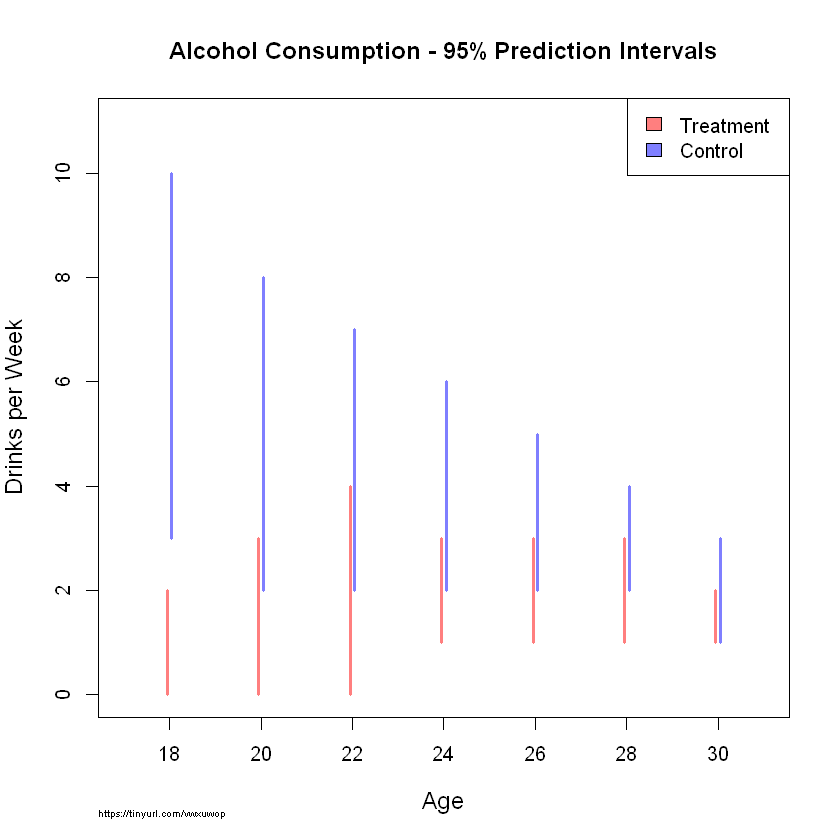

In [24]:
trt = matrix(NA,nrow=2,ncol=7)
ctrl = matrix(NA,nrow=2,ncol=7) 

trt[,1]=c(0, 2) #18
ctrl[,1]=c(3, 10)
trt[,2]=c(0, 3) #20
ctrl[,2]=c(2, 8)
trt[,3]=c(0, 4) #22
ctrl[,3]=c(2, 7)
trt[,4]=c(1, 3) #24
ctrl[,4]=c(2, 6)
trt[,5]=c(1, 3) #26
ctrl[,5]=c(2, 5)
trt[,6]=c(1, 3) #28
ctrl[,6]=c(2, 4)
trt[,7]=c(1, 2) #30
ctrl[,7]=c(1, 3)


c1 = rgb(red = 1, green = 0, blue = 0, alpha = 0.5) #trt
c2 = rgb(red = 0, green = 0, blue = 1, alpha = 0.5) #ctrl

plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,31), ylim = c(0,11), cex.lab=1.2,
     main = "Alcohol Consumption - 95% Prediction Intervals", xlab = "Age",ylab = "Drinks per Week")

for (age in seq(from=18,to=30,by=2)) { 
  segments(x0 = age-0.05, y0 = trt[1, (age-18)/2+1],
           x1 = age-0.05, y1 = trt[2, (age-18)/2+1],lwd = 3,col=c1)
  
  segments(x0 = age+0.05, y0 = ctrl[1, (age-18)/2+1],
           x1 = age+0.05, y1 = ctrl[2, (age-18)/2+1],lwd = 3,col=c2)
}
legend('topright',legend=c('Treatment','Control'),fill=c(c1,c2))
mtext("https://tinyurl.com/vwxuwop", side = 1, cex = 0.5, adj = 0, padj = 10)